# Install & Load Package

In [76]:
!pip install dalex
!pip install scikit-plot
!pip install shap
!pip install eli5
!pip install lime

In [77]:
# import pandas for data wrangling
import pandas as pd
# import numpy for vectorize data manipulation
import numpy as np
# import matplotlib.pyplot module for data visualization
import matplotlib.pyplot as plt
# import seaborn for data visualization
import seaborn as sns
# import scipy for certain statistical function
from scipy import stats

# import train and test split method from scikit-learn
from sklearn.model_selection import train_test_split
# import metrics method for model evaluation
import sklearn.metrics as metrics
# import random forest classifier
from sklearn.ensemble import RandomForestClassifier
# import multi-layer perceptron
from sklearn.neural_network import MLPClassifier
# import decision tree model as surrogate model
from sklearn.tree import DecisionTreeClassifier
# import tree module
from sklearn import tree

# import xgboost classifier
from xgboost import XGBClassifier

# import dalex to explain complex model
import dalex as dx

# load scikit-plot modules
import scikitplot as skplt

# load shap package for shap explanation
import shap

# load eli5
import eli5

# load LimeTabularExplainer for LIME method
from lime.lime_tabular import LimeTabularExplainer 

# load logistic regression model
from sklearn.linear_model import LogisticRegression
# Lload k-nearest neighbors model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

# Load Dataset

In [78]:
# load Insurance Fraud dataset
InsuranceFraud = pd.read_csv("https://raw.githubusercontent.com/hadimaster65555/dataset_for_teaching/main/dataset/car_insurance_fraud_dataset/insuranceFraud.csv")

In [79]:
# check the first 5 data frim Insurance Fraud
InsuranceFraud.head()

months_as_customer  age  policy_number policy_bind_date policy_state  \
0                 328   48         521585       10/17/2014           OH   
1                 228   42         342868        6/27/2006           IN   
2                 134   29         687698         9/6/2000           OH   
3                 256   41         227811        5/25/1990           IL   
4                 228   44         367455         6/6/2014           IL   

  policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0    250/500               1000                1406.91               0   
1    250/500               2000                1197.22         5000000   
2    100/300               2000                1413.14         5000000   
3    250/500               2000                1415.74         6000000   
4   500/1000               1000                1583.91         6000000   

   insured_zip  ... witnesses police_report_available total_claim_amount  \
0       466132  ...         2                     YES              71610   
1       468176  ...         0                       ?               5070   
2       430632  ...         3                      NO              34650   
3       608117  ...         2                      NO              63400   
4       610706  ...         1                      NO               6500   

  injury_claim property_claim  vehicle_claim  auto_make auto_model auto_year  \
0         6510          13020          52080       Saab        92x      2004   
1          780            780           3510   Mercedes       E400      2007   
2         7700           3850          23100      Dodge        RAM      2007   
3         6340           6340          50720  Chevrolet      Tahoe      2014   
4         1300            650           4550     Accura        RSX      2009   

  fraud_reported  
0              Y  
1              Y  
2              N  
3              Y  
4              N  

[5 rows x 39 columns]

# Data Inspection

In [80]:
# check Insurance Fraud data structure and its types
InsuranceFraud.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

In [81]:
# check data dimension
InsuranceFraud.shape

(1000, 39)

In [82]:
# replace "?" to NaN
InsuranceFraud.replace("?", np.nan, inplace = True)
InsuranceFraud.head(5)

months_as_customer  age  policy_number policy_bind_date policy_state  \
0                 328   48         521585       10/17/2014           OH   
1                 228   42         342868        6/27/2006           IN   
2                 134   29         687698         9/6/2000           OH   
3                 256   41         227811        5/25/1990           IL   
4                 228   44         367455         6/6/2014           IL   

  policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0    250/500               1000                1406.91               0   
1    250/500               2000                1197.22         5000000   
2    100/300               2000                1413.14         5000000   
3    250/500               2000                1415.74         6000000   
4   500/1000               1000                1583.91         6000000   

   insured_zip  ... witnesses police_report_available total_claim_amount  \
0       466132  ...         2                     YES              71610   
1       468176  ...         0                     NaN               5070   
2       430632  ...         3                      NO              34650   
3       608117  ...         2                      NO              63400   
4       610706  ...         1                      NO               6500   

  injury_claim property_claim  vehicle_claim  auto_make auto_model auto_year  \
0         6510          13020          52080       Saab        92x      2004   
1          780            780           3510   Mercedes       E400      2007   
2         7700           3850          23100      Dodge        RAM      2007   
3         6340           6340          50720  Chevrolet      Tahoe      2014   
4         1300            650           4550     Accura        RSX      2009   

  fraud_reported  
0              Y  
1              Y  
2              N  
3              Y  
4              N  

[5 rows x 39 columns]

In [83]:
# check null values inside dataset
InsuranceFraud.isna().sum()

months_as_customer               0
age                              0
policy_number                    0
policy_bind_date                 0
policy_state                     0
policy_csl                       0
policy_deductable                0
policy_annual_premium            0
umbrella_limit                   0
insured_zip                      0
insured_sex                      0
insured_education_level          0
insured_occupation               0
insured_hobbies                  0
insured_relationship             0
capital-gains                    0
capital-loss                     0
incident_date                    0
incident_type                    0
collision_type                 178
incident_severity                0
authorities_contacted            0
incident_state                   0
incident_city                    0
incident_location                0
incident_hour_of_the_day         0
number_of_vehicles_involved      0
property_damage                360
bodily_injuries     

**1. Identifikasi berapa banyak nilai null yang terdapat di dalam dataset.**

Di dalam dataset ini terdapat nilai null "?" sebanyak 178 di kolom "collision_type", 360 di kolom "property_damage", dan 343 di kolom "police_report_available".

In [84]:
# drop certain columns
InsuranceFraud = InsuranceFraud.drop(['collision_type', 'property_damage', 'police_report_available', 'policy_number'], axis = 1)

In [85]:
# check data dimension
InsuranceFraud.shape

(1000, 35)

**2.Lakukan treatment pada kolom yang bernilai NA atau NULL. Berikan alasan anda mengapa anda melakukan treatment tertentu pada nilai NA tersebut.**

Treatment yang saya lakukan pada kolom yang bernilai null adalah dengan menghapus kolom yang terdapat nilai null karena jumlah nilai null banyak sehingga kolom tersebut tidak dapat dijadikan sebagai variabel prediktor. Lalu drop kolom tersebut beserta policy_number yang merupakan kode unik setiap nasabah.

In [86]:
#Convertin the predictor variable in a binary numeric variable
InsuranceFraud['fraud_reported'].replace(to_replace='Y', value=1, inplace=True)
InsuranceFraud['fraud_reported'].replace(to_replace='N',  value=0, inplace=True)

# Simple EDA

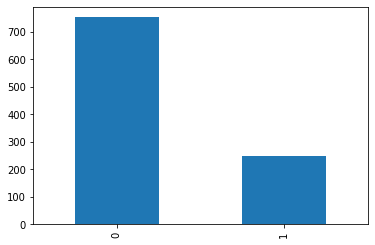

In [87]:
# check target class distribution
InsuranceFraud['fraud_reported'].value_counts().plot(kind = 'bar')

In [88]:
# typecasting date data to datetime
InsuranceFraud['policy_bind_date']= InsuranceFraud.policy_bind_date.astype('datetime64')
InsuranceFraud['incident_date'] = InsuranceFraud.incident_date.astype('datetime64')

# feature engineering: create 'period_incident' column with formula: 'incident_date' - 'policy_bind_date'
InsuranceFraud['period_incident'] = (InsuranceFraud['incident_date'] - InsuranceFraud['policy_bind_date']).dt.days

# drop certain columns
InsuranceFraud = InsuranceFraud.drop(['policy_bind_date', 'incident_date'], axis = 1)

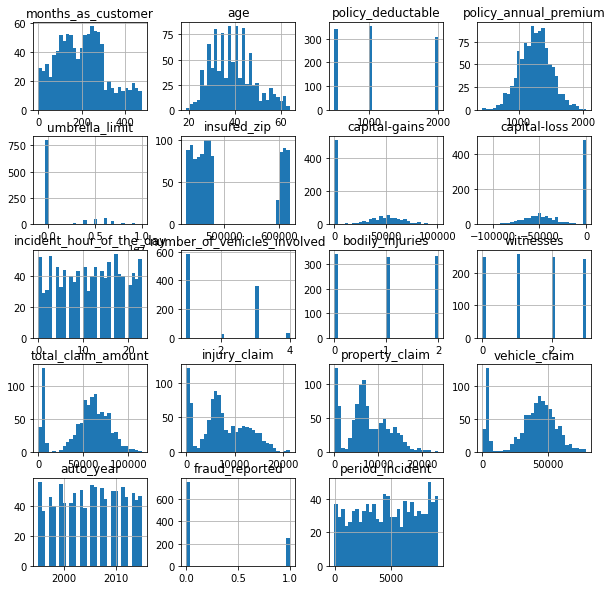

In [89]:
# check numerical data distribution
InsuranceFraud.hist(bins=30, figsize = (10, 10));

# Train-Test Split

In [90]:
# cretate predictor variables as X
X = InsuranceFraud.drop(['fraud_reported'], axis = 1)
# create target data as y
y = InsuranceFraud['fraud_reported']

In [91]:
# split data to train and test data
# where 30% of InsuranceFraud are test data
# stratify data based on y varibales
# and freeze RNG with random_state = 1000
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y, 
    test_size=0.3,
    stratify = y, 
    random_state=1000
)

In [92]:
# check train data dimension
X_train.shape

(700, 33)

In [93]:
# check test data dimension
X_test.shape

(300, 33)

In [94]:
# check train target counts
y_train.value_counts()

0    527
1    173
Name: fraud_reported, dtype: int64

In [95]:
# check test target counts
y_test.value_counts()

0    226
1     74
Name: fraud_reported, dtype: int64

# Exploratory Data Analysis

In [96]:
# create correlation matrix
X_train.corr()

months_as_customer       age  policy_deductable  \
months_as_customer                     1.000000  0.928530           0.030500   
age                                    0.928530  1.000000           0.035519   
policy_deductable                      0.030500  0.035519           1.000000   
policy_annual_premium                  0.000647  0.014770          -0.007318   
umbrella_limit                         0.045459  0.061812           0.032130   
insured_zip                            0.029378  0.045039          -0.006292   
capital-gains                          0.019551  0.008969          -0.003138   
capital-loss                           0.022955  0.022670           0.010018   
incident_hour_of_the_day               0.061915  0.083344           0.089707   
number_of_vehicles_involved           -0.021797 -0.021826           0.037804   
bodily_injuries                       -0.012758 -0.034142          -0.060798   
witnesses                              0.029554  0.030903           0.068521   
total_claim_amount                     0.031927  0.042654           0.023634   
injury_claim                           0.022135  0.037019           0.045951   
property_claim                         0.008416  0.028981           0.089583   
vehicle_claim                          0.036774  0.042700          -0.001607   
auto_year                             -0.037010 -0.023527           0.008893   
period_incident                        0.057355  0.054941           0.052140   

                             policy_annual_premium  umbrella_limit  \
months_as_customer                        0.000647        0.045459   
age                                       0.014770        0.061812   
policy_deductable                        -0.007318        0.032130   
policy_annual_premium                     1.000000       -0.006476   
umbrella_limit                           -0.006476        1.000000   
insured_zip                               0.018185       -0.013679   
capital-gains                            -0.001109       -0.041338   
capital-loss                             -0.011339       -0.036629   
incident_hour_of_the_day                  0.013405        0.007683   
number_of_vehicles_involved               0.003803       -0.015303   
bodily_injuries                           0.007554        0.043055   
witnesses                                -0.005739       -0.031971   
total_claim_amount                        0.011594       -0.042037   
injury_claim                             -0.000859       -0.044782   
property_claim                           -0.000291       -0.012161   
vehicle_claim                             0.016480       -0.044153   
auto_year                                -0.050723        0.007976   
period_incident                          -0.030040       -0.044068   

                             insured_zip  capital-gains  capital-loss  \
months_as_customer              0.029378       0.019551      0.022955   
age                             0.045039       0.008969      0.022670   
policy_deductable              -0.006292      -0.003138      0.010018   
policy_annual_premium           0.018185      -0.001109     -0.011339   
umbrella_limit                 -0.013679      -0.041338     -0.036629   
insured_zip                     1.000000       0.036661      0.045136   
capital-gains                   0.036661       1.000000     -0.034257   
capital-loss                    0.045136      -0.034257      1.000000   
incident_hour_of_the_day        0.031451       0.010671     -0.013091   
number_of_vehicles_involved     0.054526       0.077853      0.018304   
bodily_injuries                 0.037154       0.071824     -0.009646   
witnesses                      -0.015597      -0.026790     -0.014428   
total_claim_amount             -0.036053       0.034051     -0.002512   
injury_claim                   -0.011228       0.032560     -0.020585   
property_claim                 -0.018719       0.017477      0.023309   
vehicle_c

In [97]:
# pull numerical column
var_name = X_train.select_dtypes(include = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64'])

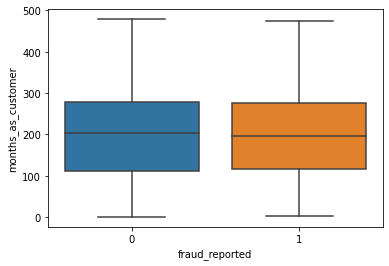

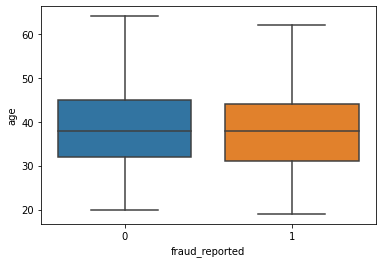

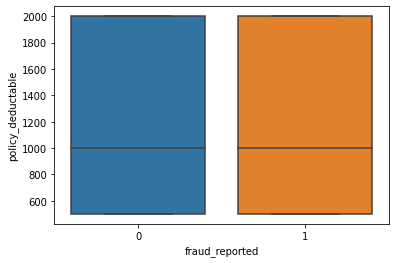

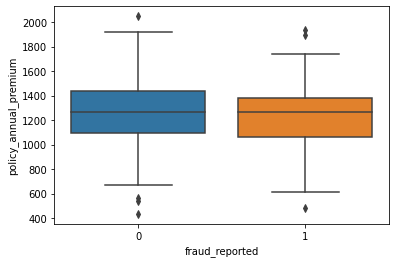

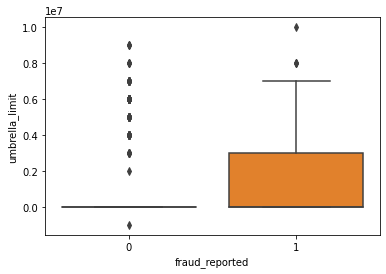

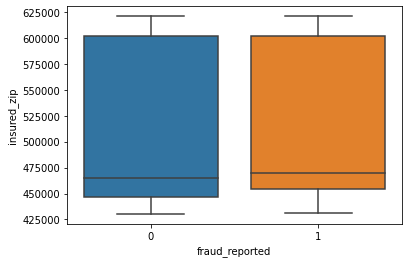

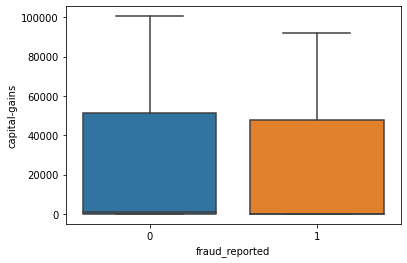

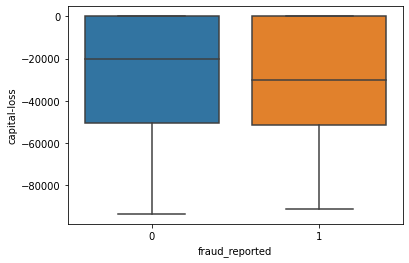

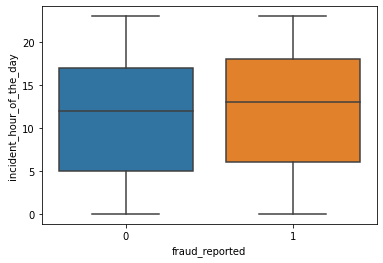

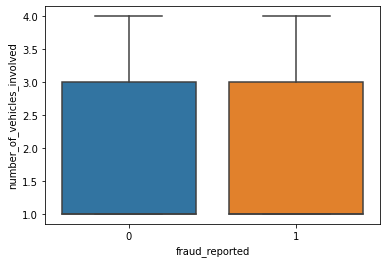

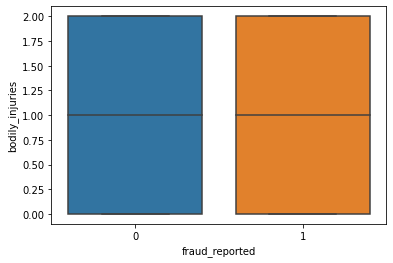

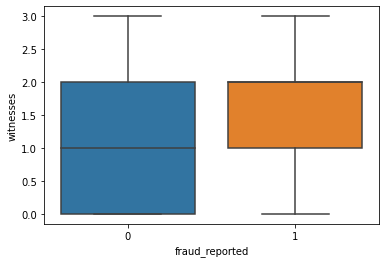

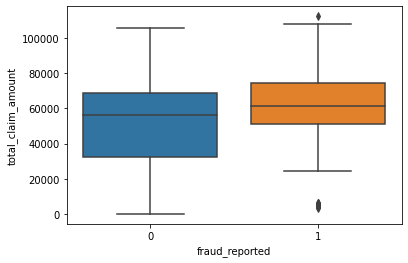

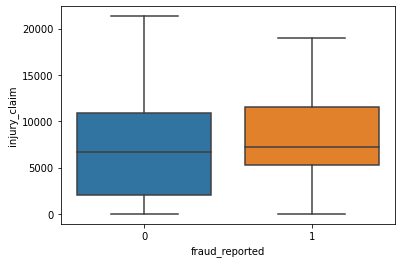

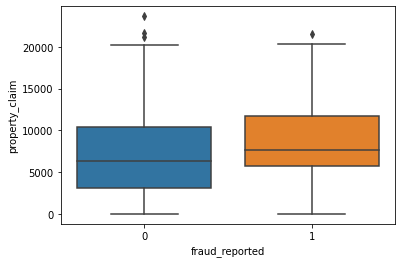

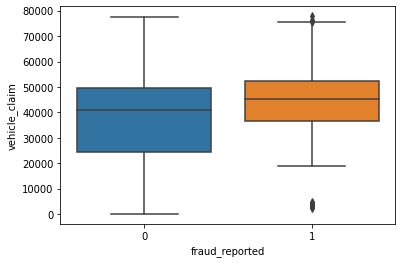

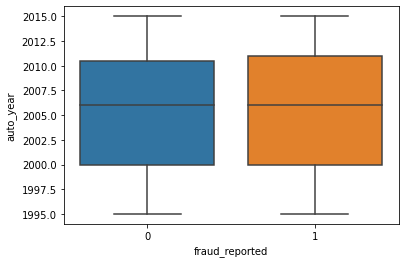

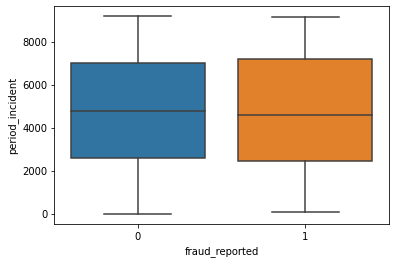

In [98]:
# plot box plot
for col_names in var_name:
  plt.figure()
  sns.boxplot(x = y_train, y = X_train[col_names]);

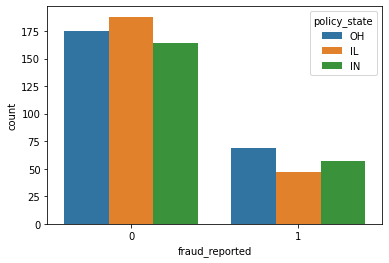

In [99]:
# visualize correlation between 'fraud_reported' and other category variables
sns.countplot(
    data=pd.concat([X_train, y_train], axis = 1),
    x = "fraud_reported",
    hue = "policy_state"
);

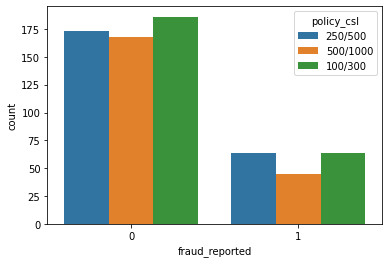

In [100]:
# visualize correlation between 'fraud_reported' and other category variables
sns.countplot(
    data=pd.concat([X_train, y_train], axis = 1),
    x = "fraud_reported",
    hue = "policy_csl"
);

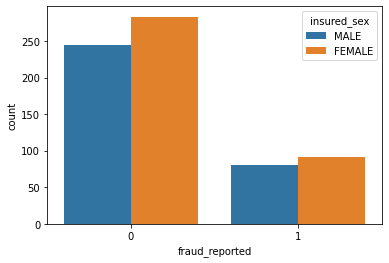

In [101]:
# visualize correlation between 'fraud_reported' and other category variables
sns.countplot(
    data=pd.concat([X_train, y_train], axis = 1),
    x = "fraud_reported",
    hue = "insured_sex"
);

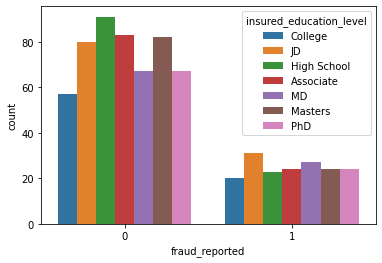

In [102]:
# visualize correlation between 'fraud_reported' and other category variables
sns.countplot(
    data=pd.concat([X_train, y_train], axis = 1),
    x = "fraud_reported",
    hue = "insured_education_level"
);

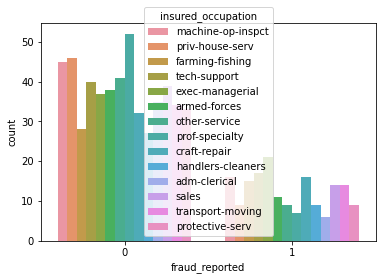

In [103]:
# visualize correlation between 'fraud_reported' and other category variables
sns.countplot(
    data=pd.concat([X_train, y_train], axis = 1),
    x = "fraud_reported",
    hue = "insured_occupation"
);

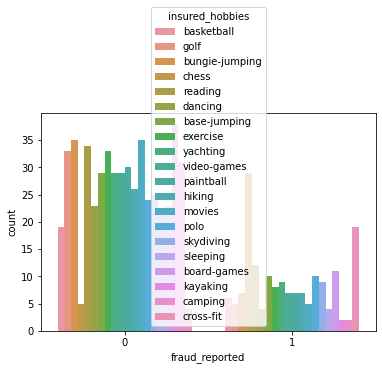

In [104]:
# visualize correlation between 'fraud_reported' and other category variables
sns.countplot(
    data=pd.concat([X_train, y_train], axis = 1),
    x = "fraud_reported",
    hue = "insured_hobbies"
);

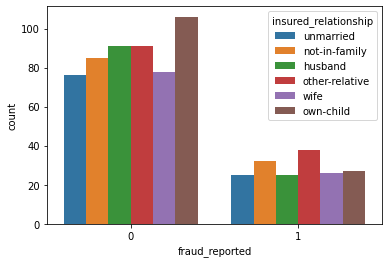

In [105]:
# visualize correlation between 'fraud_reported' and other category variables
sns.countplot(
    data=pd.concat([X_train, y_train], axis = 1),
    x = "fraud_reported",
    hue = "insured_relationship"
);

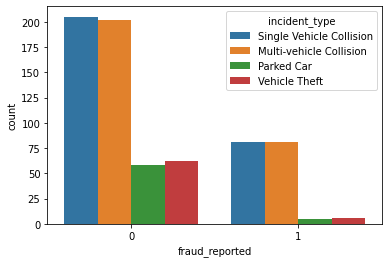

In [106]:
# visualize correlation between 'fraud_reported' and other category variables
sns.countplot(
    data=pd.concat([X_train, y_train], axis = 1),
    x = "fraud_reported",
    hue = "incident_type"
);

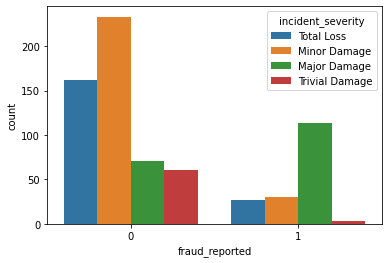

In [107]:
# visualize correlation between 'fraud_reported' and other category variables
sns.countplot(
    data=pd.concat([X_train, y_train], axis = 1),
    x = "fraud_reported",
    hue = "incident_severity"
);

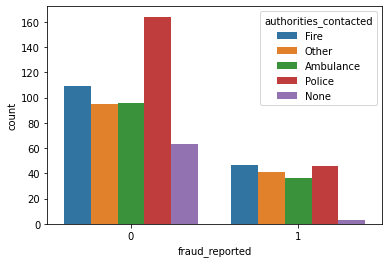

In [108]:
# visualize correlation between 'fraud_reported' and other category variables
sns.countplot(
    data=pd.concat([X_train, y_train], axis = 1),
    x = "fraud_reported",
    hue = "authorities_contacted"
);

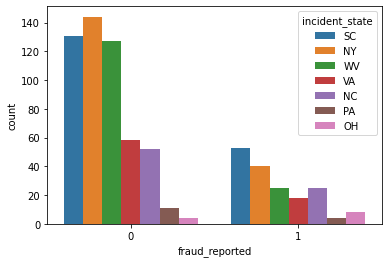

In [109]:
# visualize correlation between 'fraud_reported' and other category variables
sns.countplot(
    data=pd.concat([X_train, y_train], axis = 1),
    x = "fraud_reported",
    hue = "incident_state"
);

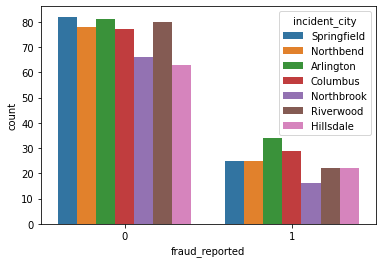

In [110]:
# visualize correlation between 'fraud_reported' and other category variables
sns.countplot(
    data=pd.concat([X_train, y_train], axis = 1),
    x = "fraud_reported",
    hue = "incident_city"
);

In [111]:
# drop certain column on train data
column_to_drop = ['months_as_customer', 'age', 'policy_state', 'policy_csl', 'policy_deductable', 'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex', 'insured_education_level', 'insured_occupation', 'insured_hobbies', 'insured_relationship', 'capital-gains', 'incident_type', 'incident_severity', 'authorities_contacted', 'incident_state', 'incident_city', 'incident_location', 'incident_hour_of_the_day', 'number_of_vehicles_involved', 'bodily_injuries', 'witnesses', 'auto_make', 'auto_model', 'auto_year', 'period_incident']
X_train = X_train.drop(column_to_drop, axis = 1)

# drop certain column in test data
X_test = X_test.drop(column_to_drop, axis = 1)

**3. Lakukan analisis pada beberapa variabel prediktor dan interpretasikan analisisnya
dengan mengaitkan analisanya dengan variabel target. Pilihlah beberapa variabel
yang akan digunakan untuk modeling berdasarkan hasil analisa.**

Berdasarkan box plot dari variabel dengan tipe int dan float : Variabel "capital_loss", "total_claim_amount", "injury_claim", "property_claim", dan "vehicle_claim yang dikategorikan berdasarkan variabel target "fraud_reported" memiliki nilai median yang berbeda artinya variabel tersebut menjadi pengaruh terjadinya fraud.

Sedangkan berdasarkan count plot dari variabel category : Semua variabel memiliki distribusi yang sama meskipun frekuensi yang tidak fraud lebih banyak karena jumlah sampel tidak fraud memang lebih banyak daripada yang fraud. Jadi semua variabel category tidak berpengaruh terjadinya fraud.

Berdasarkan hasil analisis tersebut, saya memilih variabel "capital_loss", "total_claim_amount", "injury_claim", "property_claim", dan "vehicle_claim" yang akan saya gunakan dalam modeling.

# Modeling

## Logistics Regression

**Hyperparameter tuning using grid method**

In [112]:
param_grid1 = {
    'penalty' : ['elasticnet', 'l2'],
    'fit_intercept' : [True,False],
    'C' : [0.25, 0.5, 0.75, 1.0]
    }
lr = GridSearchCV(LogisticRegression(), param_grid1, cv=3, scoring='accuracy')

lr.fit(X_train, y_train)
lr.best_params_

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning:


24 fits failed out of a total of 48.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
24 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 449, in _check_solver
    % (solver, penalty)
ValueError: Solve

{'C': 0.25, 'fit_intercept': True, 'penalty': 'l2'}

**Model**

In [113]:
# Define Logistic Regression model
logistic_regression = LogisticRegression(
    penalty = 'l2',
    fit_intercept = True,
    C = 0.25
)
# fit model to training data
logistic_regression.fit(X_train, y_train)

LogisticRegression(C=0.25)

## K-Nearest Neighbors

**Hyperparameter tuning using grid method**

In [114]:
param_grid2 = {
    'n_neighbors': range(2, 5),
    'p': range(1, 2)
    }
knn = GridSearchCV(KNeighborsClassifier(), param_grid2, cv=3, scoring='accuracy')

knn.fit(X_train, y_train)
knn.best_params_

{'n_neighbors': 2, 'p': 1}

**Model**

In [115]:
# Define K-Nearest Neighbors model
k_nearest_neighbors = KNeighborsClassifier(
    n_neighbors = 2,
    p = 1
)
# fit model to training data
k_nearest_neighbors.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=2, p=1)

## Random Forest

**Hyperparameter tuning using grid method**

In [116]:
param_grid3 = {
    'n_estimators': [10, 50, 100, 1000],
    'criterion': ['gini', 'entropy'],
    'max_depth' : [3,5,10, None],
    'max_features' : ['sqrt', 'log2']
    }
rf = GridSearchCV(RandomForestClassifier(), param_grid3, cv=3, scoring='accuracy')

rf.fit(X_train, y_train)
rf.best_params_

{'criterion': 'entropy',
 'max_depth': 3,
 'max_features': 'sqrt',
 'n_estimators': 50}

**Model**

In [117]:
# define random forest model
random_forest_clf = RandomForestClassifier(
    n_estimators = 50,
    criterion = 'entropy',
    max_depth = 3,
    max_features = 'sqrt'
)
# fit model to training data
random_forest_clf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=3, max_features='sqrt',
                       n_estimators=50)

## XGBoost

**Hyperparameter tuning using grid method**

In [118]:
param_grid4 = {
    'n_estimators' : [10, 50, 100],
    'max_depth' : [3,5,10,None],
    'learning_rate' : [0.1, 0.05, 0.01],
    'grow_policy' : ['depthwise', 'lossguide']
}
xgb = GridSearchCV(XGBClassifier(), param_grid4, cv=3, scoring='accuracy')

xgb.fit(X_train, y_train)
xgb.best_params_

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning:


54 fits failed out of a total of 216.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
54 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/xgboost/sklearn.py", line 732, in fit
    callbacks=callbacks)
  File "/usr/local/lib/python3.7/dist-packages/xgboost/training.py", line 216, in train
    xgb_model=xgb_model, callbacks=callbacks)
  File "/usr/local/lib/python3.7/dist-packages/xgboost/training.py", lin

{'grow_policy': 'depthwise',
 'learning_rate': 0.05,
 'max_depth': 3,
 'n_estimators': 50}

**Model**

In [119]:
# fit model no training data
xgb_clf = XGBClassifier(
    n_estimators = 50,
    max_depth = 3,
    learning_rate = 0.05,
    grow_policy = 'depthwise'
)

xgb_clf.fit(X_train, y_train)

XGBClassifier(grow_policy='depthwise', learning_rate=0.05, n_estimators=50)

# Model Evaluation

In [120]:
# Logistic Regression prediction
lr_pred = logistic_regression.predict(X_test)
lr_pred_proba = logistic_regression.predict_proba(X_test)

# K-Nearest Neighbors prediction
knn_pred = k_nearest_neighbors.predict(X_test)
knn_pred_proba = k_nearest_neighbors.predict_proba(X_test)

# Random Forest prediction
rf_pred = random_forest_clf.predict(X_test)
rf_pred_proba = random_forest_clf.predict_proba(X_test)

# XGBoost prediction
xgb_pred = xgb_clf.predict(X_test)
xgb_pred_proba = xgb_clf.predict_proba(X_test)

## Logistics Regression

**Classification Report**

In [121]:
# Logistic Regression prediction result
pd.DataFrame(metrics.classification_report(y_test, lr_pred, target_names=['0','1'], output_dict=True))

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



0     1  accuracy   macro avg  weighted avg
precision    0.753333   0.0  0.753333    0.376667      0.567511
recall       1.000000   0.0  0.753333    0.500000      0.753333
f1-score     0.859316   0.0  0.753333    0.429658      0.647351
support    226.000000  74.0  0.753333  300.000000    300.000000

**Confusion Matrix**

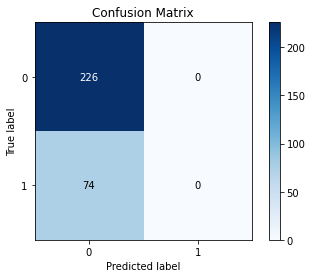

In [122]:
# Logistic Regression result
skplt.metrics.plot_confusion_matrix(y_test, lr_pred);

**ROC-AUC**

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.



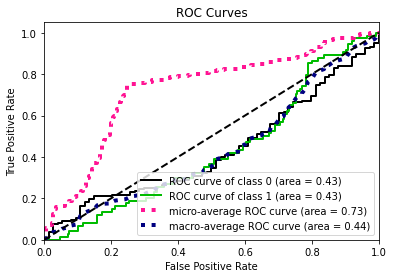

In [123]:
# Logistic Regression result
skplt.metrics.plot_roc_curve(y_test, lr_pred_proba);

Best Threshold=0.3145168484418398, G-Mean=0.4387230061282343


0.2660550458715597

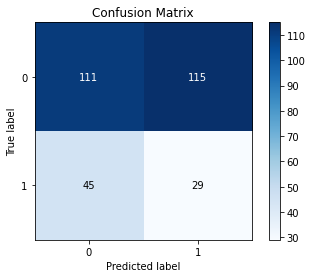

In [124]:
# find fpr and tpr using roc_curve() method
fpr, tpr, thresholds = metrics.roc_curve(y_test, lr_pred_proba[:,1])
# calculate g-means
gmeans = np.sqrt(tpr * (1-fpr))
# find the best threshold
ix = np.argmax(gmeans)
print('Best Threshold={}, G-Mean={}'.format(thresholds[ix], gmeans[ix]))
# change predict proba result to optimized one using new threshold
lr_pred1 = (lr_pred_proba[:,1] >= thresholds[ix]).astype(int)
# visualize confusion matrix after setting new threshold
skplt.metrics.plot_confusion_matrix(y_test, lr_pred1);
# check f1-score
metrics.f1_score(y_test, lr_pred1)

In [125]:
# check classification report result of new prediction result
pd.DataFrame(metrics.classification_report(y_test, lr_pred1, target_names=['0','1'], output_dict=True))

0          1  accuracy   macro avg  weighted avg
precision    0.711538   0.201389  0.466667    0.456464      0.585702
recall       0.491150   0.391892  0.466667    0.441521      0.466667
f1-score     0.581152   0.266055  0.466667    0.423603      0.503428
support    226.000000  74.000000  0.466667  300.000000    300.000000

## K-Nearest Neighbors

**Classification Report**

In [126]:
# K-Nearest Neighbors prediction result
pd.DataFrame(metrics.classification_report(y_test, knn_pred, target_names=['0','1'], output_dict=True))

0          1  accuracy   macro avg  weighted avg
precision    0.760714   0.350000  0.733333    0.555357      0.659405
recall       0.942478   0.094595  0.733333    0.518536      0.733333
f1-score     0.841897   0.148936  0.733333    0.495417      0.670967
support    226.000000  74.000000  0.733333  300.000000    300.000000

**Confusion Matrix**

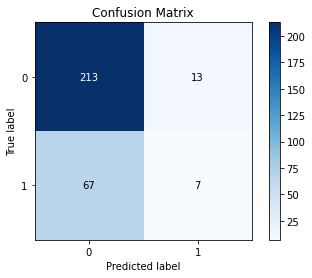

In [127]:
# K-Nearest Neighbors result
skplt.metrics.plot_confusion_matrix(y_test, knn_pred);

**ROC-AUC**

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.



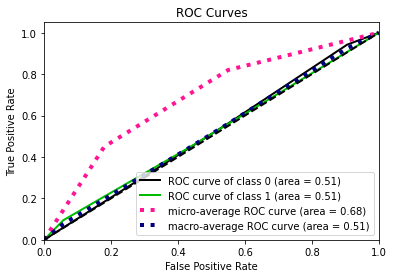

In [128]:
# K-Nearest Neighbors result
skplt.metrics.plot_roc_curve(y_test, knn_pred_proba);

Best Threshold=0.5, G-Mean=0.5025645781648588


0.32195121951219513

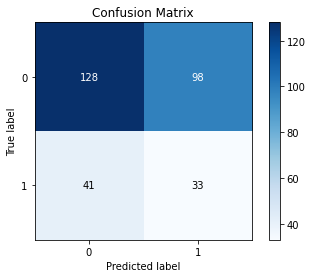

In [129]:
# find fpr and tpr using roc_curve() method
fpr, tpr, thresholds = metrics.roc_curve(y_test, knn_pred_proba[:,1])
# calculate g-means
gmeans = np.sqrt(tpr * (1-fpr))
# find the best threshold
ix = np.argmax(gmeans)
print('Best Threshold={}, G-Mean={}'.format(thresholds[ix], gmeans[ix]))
# change predict proba result to optimized one using new threshold
knn_pred1 = (knn_pred_proba[:,1] >= thresholds[ix]).astype(int)
# visualize confusion matrix after setting new threshold
skplt.metrics.plot_confusion_matrix(y_test, knn_pred1);
# check f1-score
metrics.f1_score(y_test, knn_pred1)

In [130]:
# check classification report result of new prediction result
pd.DataFrame(metrics.classification_report(y_test, knn_pred1, target_names=['0','1'], output_dict=True))

0          1  accuracy   macro avg  weighted avg
precision    0.757396   0.251908  0.536667    0.504652      0.632709
recall       0.566372   0.445946  0.536667    0.506159      0.536667
f1-score     0.648101   0.321951  0.536667    0.485026      0.567651
support    226.000000  74.000000  0.536667  300.000000    300.000000

## Random Forest

**Classification Report**

In [131]:
# Random Forest prediction result
pd.DataFrame(metrics.classification_report(y_test, rf_pred, target_names=['0','1'], output_dict=True))

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



0     1  accuracy   macro avg  weighted avg
precision    0.753333   0.0  0.753333    0.376667      0.567511
recall       1.000000   0.0  0.753333    0.500000      0.753333
f1-score     0.859316   0.0  0.753333    0.429658      0.647351
support    226.000000  74.0  0.753333  300.000000    300.000000

**Confusion Matrix**

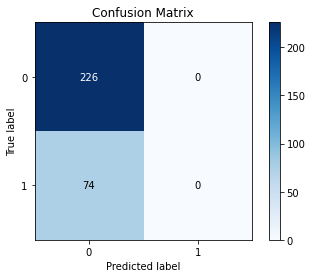

In [132]:
# Random Forest result
skplt.metrics.plot_confusion_matrix(y_test, rf_pred);

**ROC-AUC**

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.



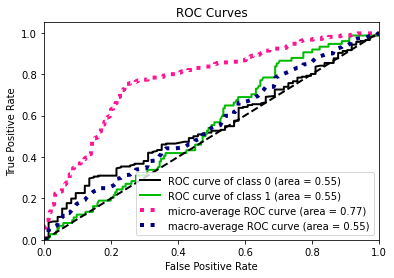

In [133]:
# Random Forest result
skplt.metrics.plot_roc_curve(y_test, rf_pred_proba);

Best Threshold=0.27712112936093797, G-Mean=0.5463452969038314


0.3934426229508197

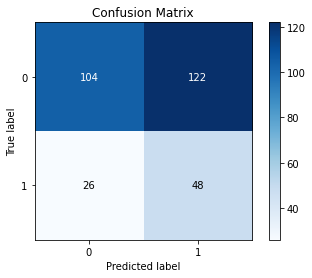

In [134]:
# find fpr and tpr using roc_curve() method
fpr, tpr, thresholds = metrics.roc_curve(y_test, rf_pred_proba[:,1])
# calculate g-means
gmeans = np.sqrt(tpr * (1-fpr))
# find the best threshold
ix = np.argmax(gmeans)
print('Best Threshold={}, G-Mean={}'.format(thresholds[ix], gmeans[ix]))
# change predict proba result to optimized one using new threshold
rf_pred1 = (rf_pred_proba[:,1] >= thresholds[ix]).astype(int)
# visualize confusion matrix after setting new threshold
skplt.metrics.plot_confusion_matrix(y_test, rf_pred1);
# check f1-score
metrics.f1_score(y_test, rf_pred1)

In [135]:
# check classification report result of new prediction result
pd.DataFrame(metrics.classification_report(y_test, rf_pred1, target_names=['0','1'], output_dict=True))

0          1  accuracy   macro avg  weighted avg
precision    0.800000   0.282353  0.506667    0.541176      0.672314
recall       0.460177   0.648649  0.506667    0.554413      0.506667
f1-score     0.584270   0.393443  0.506667    0.488856      0.537199
support    226.000000  74.000000  0.506667  300.000000    300.000000

## XGBoost

**Classification Report**

In [136]:
# XGBoost prediction result
pd.DataFrame(metrics.classification_report(y_test, xgb_pred, target_names=['0','1'], output_dict=True))

0          1  accuracy   macro avg  weighted avg
precision    0.754209   0.333333      0.75    0.543771      0.650393
recall       0.991150   0.013514      0.75    0.502332      0.750000
f1-score     0.856597   0.025974      0.75    0.441285      0.651710
support    226.000000  74.000000      0.75  300.000000    300.000000

**Confusion Matrix**

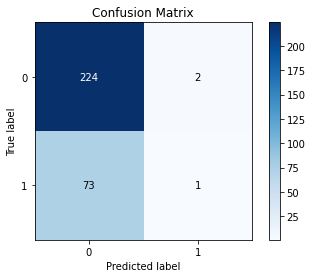

In [137]:
# XGBoost result
skplt.metrics.plot_confusion_matrix(y_test, xgb_pred);

**ROC-AUC**

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.



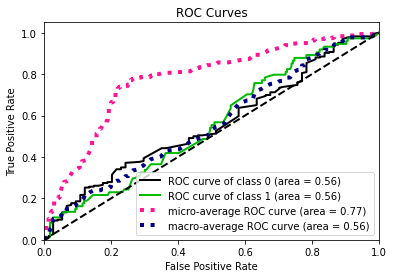

In [138]:
# XGBoost result
skplt.metrics.plot_roc_curve(y_test, xgb_pred_proba);

Best Threshold=0.2756898105144501, G-Mean=0.5357356403985154


0.3870967741935484

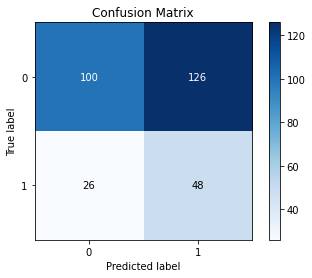

In [139]:
# find fpr and tpr using roc_curve() method
fpr, tpr, thresholds = metrics.roc_curve(y_test, xgb_pred_proba[:,1])
# calculate g-means
gmeans = np.sqrt(tpr * (1-fpr))
# find the best threshold
ix = np.argmax(gmeans)
print('Best Threshold={}, G-Mean={}'.format(thresholds[ix], gmeans[ix]))
# change predict proba result to optimized one using new threshold
xgb_pred1 = (xgb_pred_proba[:,1] >= thresholds[ix]).astype(int)
# visualize confusion matrix after setting new threshold
skplt.metrics.plot_confusion_matrix(y_test, xgb_pred1);
# check f1-score
metrics.f1_score(y_test, xgb_pred1)

In [140]:
# check classification report result of new prediction result
pd.DataFrame(metrics.classification_report(y_test, xgb_pred1, target_names=['0','1'], output_dict=True))

0          1  accuracy   macro avg  weighted avg
precision    0.793651   0.275862  0.493333    0.534756      0.665930
recall       0.442478   0.648649  0.493333    0.545563      0.493333
f1-score     0.568182   0.387097  0.493333    0.477639      0.523514
support    226.000000  74.000000  0.493333  300.000000    300.000000

**4. Buatlah model machine learning dengan regresi logistik dan KNN sebagai baseline dari model, lalu random forest dan XgBoost sebagai model lanjutan. Lakukan hyperparameter tuning menggunakan metode grid. Evaluasi model menggunakan metrik f1-score, precision, recall dan AUC. Gunakan metode G-means untuk mengatasi masalah imbalanced jika ada.**
1. Logistics Regression
*   Parameter terbaik penalty = 'l2', fit_intercept = True, C = 0.25
*   F1-score sebesar 0,27 artinya rata-rata harmoni dari precision dan recall sebesar 27%
*   Precision sebesar 0,20 artinya dari semua prediksi positif ada 20% prediksi yang benar
*   Recall sebesar 0,39 artinya semua data yang seharusnya bernilai positif ada 39% yang diprediksi tepat positif
*   Berdasarkan ROC Curve, model ini memiliki ROC-AUC sebesar 0,43 dimana letaknya berada dibawah garis random classifier sehingga model ini kurang baik.
*   G-Means = 0, 44

2. K-Nearest Neighbors
*   Parameter terbaik penalty = n_neighbors = 2, p = 1
*   F1-score sebesar 0,32 artinya rata-rata harmoni dari precision dan recall sebesar 32%
*   Precision sebesar 0,25 artinya dari semua prediksi positif ada 25% prediksi yang benar
*   Recall sebesar 0,45 artinya semua data yang seharusnya bernilai positif ada 45% yang diprediksi tepat positif
*   Berdasarkan ROC Curve, model ini memiliki ROC-AUC sebesar 0,51 dimana letaknya berada diatas garis random classifier sehingga model ini baik.
*   G-Means = 0, 50

3. Random Forest
*   Parameter terbaik n_estimators = 50, criterion = 'entropy', max_depth = 3, max_features = 'sqrt'
*   F1-score sebesar 0,39 artinya rata-rata harmoni dari precision dan recall sebesar 39%
*   Precision sebesar 0,28 artinya dari semua prediksi positif ada 28% prediksi yang benar
*   Recall sebesar 0,65 artinya semua data yang seharusnya bernilai positif ada 65% yang diprediksi tepat positif
*   Berdasarkan ROC Curve, model ini memiliki ROC-AUC sebesar 0,55 dimana letaknya berada diatas garis random classifier sehingga model ini baik.
*   G-Means = 0, 55

4. XGBoost
*   Parameter terbaik n_estimators = 50, max_depth = 3, learning_rate = 0.05, grow_policy = 'depthwise'
*   F1-score sebesar 0,39 artinya rata-rata harmoni dari precision dan recall sebesar 39%
*   Precision sebesar 0,28 artinya dari semua prediksi positif ada 28% prediksi yang benar
*   Recall sebesar 0,65 artinya semua data yang seharusnya bernilai positif ada 65% yang diprediksi tepat positif
*   Berdasarkan ROC Curve, model ini memiliki ROC-AUC sebesar 0,56 dimana letaknya berada diatas garis random classifier sehingga model ini baik.
*   G-Means = 0, 54


    
    

    

    

# Model Agnostic Methods

In [142]:
## initiate explainer for Random Forest model
InsuranceFraud_rf_exp = dx.Explainer(random_forest_clf, X_train, y_train, label = "RF Interpretation")

Preparation of a new explainer is initiated

  -> data              : 700 rows 5 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 700 values
  -> model_class       : sklearn.ensemble._forest.RandomForestClassifier (default)
  -> label             : RF Interpretation
  -> predict function  : <function yhat_proba_default at 0x7f7ea095e200> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = 0.0284, mean = 0.249, max = 0.513
  -> model type        : classification will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -0.378, mean = -0.0019, max = 0.904
  -> model_info        : package sklearn

A new explainer has been created!


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names



## Feature Importance

In [143]:
# visualizr permutation feature importance for K-Nearest Neighbors Model
InsuranceFraud_rf_exp.model_parts().plot()

## Partial Dependence Plot

In [144]:
# create partial dependence plot of K-Nearest Neighbors model
InsuranceFraud_rf_exp.model_profile().plot()

Calculating ceteris paribus: 100%|██████████| 5/5 [00:00<00:00,  7.79it/s]


**5. Interpretasikan model terbaik (berdasarkan f1-score) yang diperoleh pada model poin 4 menggunakan feature importance dan partial dependence plot. Berikan rekomendasi terkait bagaimana cara mengidentifikasi nasabah yang melakukan fraud.**

Model terbaik adalah Random Forest karena memiliki f1-score tertinggi diantara 3 model lainnya yaitu sebesar 0,39.

Berdasarkan feature importance model Random Forest, variabel "injury_claim" memiliki dampak paling besar terhadap hasil prediksi dari model sebesar 8% artinya besar kecilnya klaim untuk luka-luka merupakan variabel yang paling penting untuk digunakan dalam mengidenfikasi nasabah yang melakukan fraud.

Interpretasi berdasarkan Partial Dependence Plot :
1.   capital-loss

  Plot "capital-loss" cenderung turun sebesar 7,41% artinya semakin besar loss yang diperoleh dari ganti rugi maka peluang nasabah tersebut fraud semakin rendah.
2.   total_claim_amount

  Plot "total_claim_amount" cenderung naik sebesar 26,47% artinya semakin besar total klaim maka peluang nasabah tersebut fraud semakin tinggi.
3.   injury_claim

  Plot "injury_claim" cenderung menurun sebesar 13,79% artinya semakin besar klaim untuk luka-luka maka peluang nasabah tersebut fraud semakin rendah.
4.   property_claim

  Plot "property_claim" cenderung naik sebesar 18,75% artinya semakin besar klaim untuk kerusakan properti maka peluang nasabah tersebut fraud semakin tinggi.
5.   vehicle_claim

  Plot "vehicle_claim" cenderung naik sebesar 39,39% artinya semakin besar klaim untuk kerusakan mobil maka peluang nasabah tersebut fraud semakin tinggi.

Rekomendasi mengidentifikasi nasabah yang melakukan fraud : Mean prediction sebesar 25%. Mean prediction ini menjadi acuan rekomendasi nasabah mana yang melakukan fraud. Apabila nilai prediction lebih dari 25% maka nasabah tersebut kemungkinan melakukan fraud.

## Local Interpretable Model-Agnostic Explanation

In [145]:
# define Random Forest explainer with lime module
lime_explainer = LimeTabularExplainer(
    X_train.values,
    feature_names = X_train.columns.tolist(),
    class_names = ['NoFraud', 'fraud'],
    discretize_continuous = True,
    verbose = True
)

In [146]:
policy_number_527945 = X_train.iloc[0]
policy_number_527945

capital-loss              0
total_claim_amount    52030
injury_claim           9460
property_claim         9460
vehicle_claim         33110
Name: 757, dtype: int64

In [147]:
# explain Random Forest prediction for policy_number_527945
lime_explainer.explain_instance(policy_number_527945, k_nearest_neighbors.predict_proba).show_in_notebook(show_table=True)

Intercept 0.2385136600258882
Prediction_local [0.29715589]
Right: 0.0


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but KNeighborsClassifier was fitted with feature names



In [148]:
policy_number_235220 = X_train.iloc[1]
policy_number_235220

capital-loss              0
total_claim_amount    58140
injury_claim           6460
property_claim         6460
vehicle_claim         45220
Name: 246, dtype: int64

In [149]:
# explain Random Forest prediction for policy_number_235220
lime_explainer.explain_instance(policy_number_235220, k_nearest_neighbors.predict_proba).show_in_notebook(show_table=True)

Intercept 0.2548509166906469
Prediction_local [0.23595969]
Right: 0.0


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but KNeighborsClassifier was fitted with feature names



In [150]:
policy_number_605100 = X_train.iloc[2]
policy_number_605100

capital-loss         -77600
total_claim_amount    65800
injury_claim          13160
property_claim         6580
vehicle_claim         46060
Name: 304, dtype: int64

In [151]:
# explain Random Forest prediction for policy_number_605100
lime_explainer.explain_instance(policy_number_605100, k_nearest_neighbors.predict_proba).show_in_notebook(show_table=True)

Intercept 0.2738307933375457
Prediction_local [0.24111911]
Right: 0.0


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but KNeighborsClassifier was fitted with feature names



**6. Gunakan LIME untuk melakukan interpretasi lokal pada beberapa nomor polis : 527945, 235220, 605100. Berikan interpretasinya**

Nomor polis 527945, 235220, 605100 memiliki probabilitas NoFraud. Walaupun probabilitasnya NoFraud tapi researchnya ada yang salah karena jika dilihat dari Partial Dependence Plot LIME, polis 527945 lebih mengarah ke Fraud.